<a href="https://colab.research.google.com/github/shaid03/Machine-Learning/blob/main/Loan_Status_Predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Loan Status Prediction***

In [92]:
#import the dependencies
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data collection and Preprocessing

In [93]:
# loading the dataset to pandas Dataframe
loan_dataset = pd.read_csv('/content/loan_dataset.csv')

In [94]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [95]:
# printing the first 5 rows of the DataFrame
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [96]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [97]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


***Missing values***

In [98]:
# number of missing value in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [99]:
# droping the missing value in data set
loan_dataset = loan_dataset.dropna()

In [100]:
# number of missing value in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

***Label encoding***

In [101]:
loan_dataset.replace({"Loan_Status":{'N':0, 'Y':1}},inplace = True)

<ipython-input-101-4705743a1cc3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_dataset.replace({"Loan_Status":{'N':0, 'Y':1}},inplace = True)


In [102]:
# printing the first 5 rows of the DataFrame
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [103]:
# Dependents column value
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [104]:
# replace the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace= '3+', value = 4)

In [105]:
# Dependents column value
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

***Data Visualization***

<Axes: xlabel='Education', ylabel='count'>

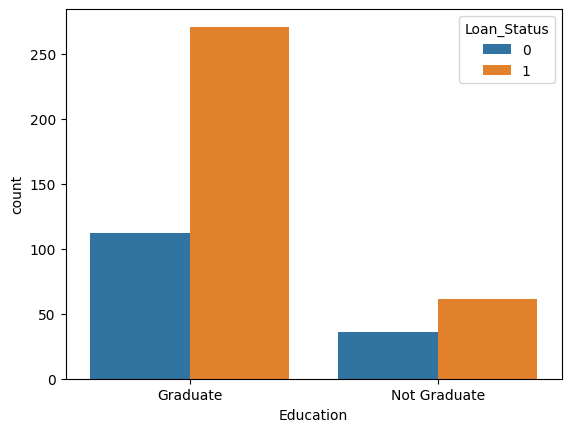

In [106]:
# education and loan status
sns.countplot(x = 'Education', hue = 'Loan_Status', data = loan_dataset)

<Axes: xlabel='Married', ylabel='count'>

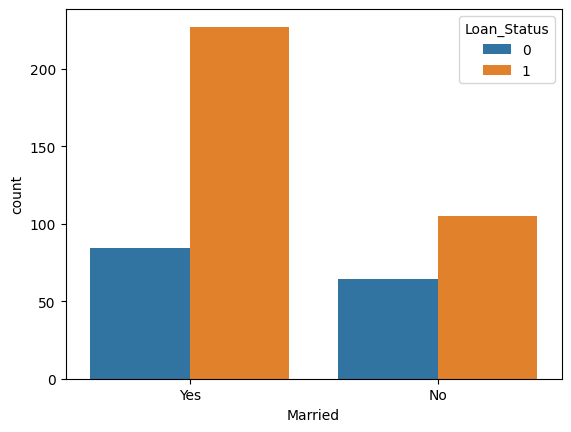

In [107]:
# married and loan status
sns.countplot(x = 'Married', hue = 'Loan_Status', data = loan_dataset)

<Axes: xlabel='Gender', ylabel='count'>

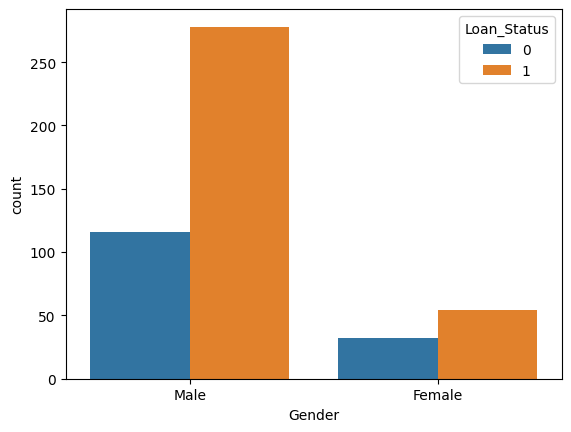

In [108]:
# Gender and loan status
sns.countplot(x = 'Gender', hue = 'Loan_Status', data = loan_dataset)

In [109]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0, 'Yes':1},'Gender':{'Male':1, 'Female':0},'Self_Employed':{'No':0, 'Yes':1},
                      'Property_Area':{'Rural':0, 'Semiurban':1, 'Urban': 2}, "Education":{'Graduate': 1, 'Not Graduate': 0}}, inplace = True)

In [110]:
loan_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1


In [111]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'], axis=1)
y = loan_dataset['Loan_Status']

In [112]:
print(X)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [113]:
print(y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


Train test split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, stratify = y, random_state=2)

In [115]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


Train the model: support vector machine (svm)

In [116]:
classifer = svm.SVC(kernel = 'linear')

In [117]:
# training the support vector machine model
classifer.fit(X_train, y_train)

SVC(kernel='linear')

***Model Evaluation***

In [118]:
# accuracy score on training data
X_train_prediction = classifer.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [119]:
print(f"Accuracy on training data: {training_data_accuracy}")

Accuracy on training data: 0.7986111111111112


In [120]:
# accuracy score on testing data
X_test_prediction = classifer.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [121]:
print(f"Accuracy on training data: {testing_data_accuracy}")

Accuracy on training data: 0.8333333333333334


In [127]:
#input_data = (1,1,1,1,0,4583,1508,128,360,1,0)
input_data = (1,1,0,0,0,7660,0,104,360,0,2)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape array
X_predict_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=classifer.predict(X_predict_reshaped)

print(prediction)
if (prediction[0]==0):
    print('Not eligible for loan')
else:
    print('Eligible for loan')

[0]
Not eligible for loan


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
